## DATA JAKARTA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Membaca file CSV
data_covid_jakarta = pd.read_csv('../data/Data Jakarta.csv').iloc[18:]
data_covid_jakarta

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
18,19/03/2020,NaN,NaN,19,13,57,121,210,50,178,1,NaN,NaN,NaN
19,20/03/2020,NaN,NaN,20,13,66,125,224,14,191,0,NaN,NaN,NaN
20,21/03/2020,NaN,NaN,23,17,71,157,268,44,228,4,NaN,NaN,NaN
21,22/03/2020,NaN,NaN,29,21,77,177,304,36,254,4,NaN,NaN,NaN
22,23/03/2020,NaN,NaN,29,22,79,225,355,51,304,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,26/06/2023,NaN,NaN,16115,1551828,124,67,1568134,10,191,25,0.0,2.0,189.0
1213,27/06/2023,NaN,NaN,16115,1551845,126,67,1568153,19,193,17,0.0,10.0,183.0
1214,28/06/2023,NaN,NaN,16115,1551857,129,63,1568164,11,192,12,0.0,10.0,182.0
1215,29/06/2023,NaN,NaN,16115,1551896,117,44,1568172,8,161,39,0.0,8.0,153.0


In [3]:
data_covid_jakarta['Case_Fatality_Rate'] = data_covid_jakarta['Meninggal'].pct_change() * 100

In [4]:
# Menghapus kolom yang tidak diperlukan
data_covid_jakarta.fillna(0, inplace=True)
data_covid_jakarta.drop(['Jam', 'Tanggal Jam',"Meninggal","Sembuh","Total Pasien"], axis=1, inplace=True)

In [5]:
# Pre-processing data
# Mengubah format tanggal menjadi format datetime
data_covid_jakarta['Tanggal'].str.strip()
data_covid_jakarta['Tanggal'] = pd.to_datetime(data_covid_jakarta['Tanggal'], format='%d/%M/%Y',exact=False).dt.date
data_covid_jakarta.head(100)


,Tanggal,Self Isolation,Masih Perawatan,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Case_Fatality_Rate
18,2020-01-19,57,121,50,178,1,0.0,0.0,0.0,0.000000
19,2020-01-20,66,125,14,191,0,0.0,0.0,0.0,5.263158
20,2020-01-21,71,157,44,228,4,0.0,0.0,0.0,15.000000
21,2020-01-22,77,177,36,254,4,0.0,0.0,0.0,26.086957
22,2020-01-23,79,225,51,304,1,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
113,2020-01-22,2901,1310,127,4211,74,0.0,0.0,0.0,0.487805
114,2020-01-23,2957,1319,166,4276,100,0.0,0.0,0.0,0.161812
115,2020-01-24,2978,1349,154,4327,94,0.0,0.0,0.0,1.453958
116,2020-01-25,3068,1338,195,4406,113,0.0,0.0,0.0,0.477707


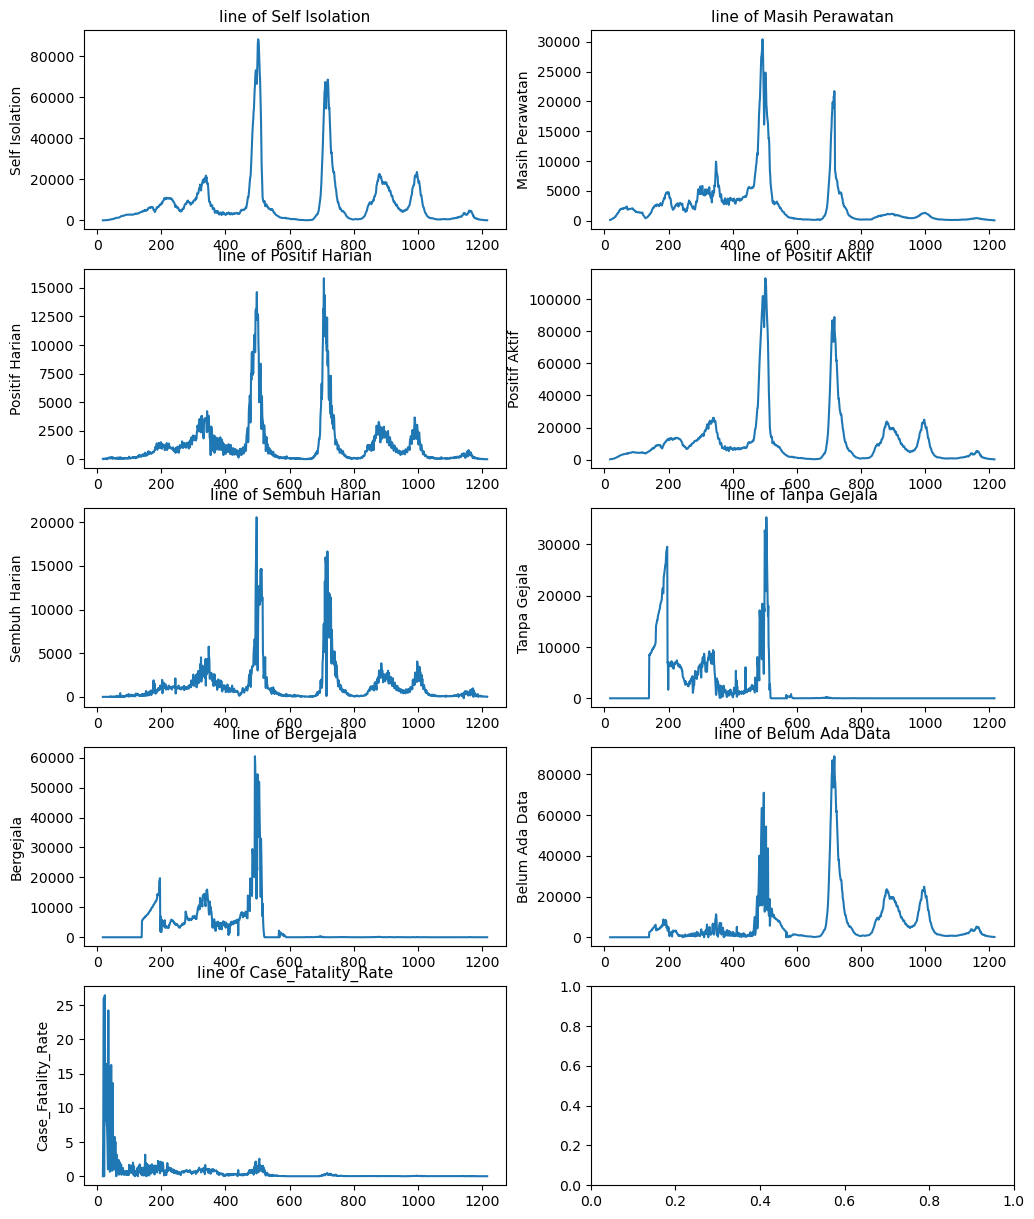

In [6]:
column_data=["Self Isolation","Masih Perawatan","Positif Harian","Positif Aktif","Sembuh Harian","Tanpa Gejala","Bergejala",
"Belum Ada Data","Case_Fatality_Rate"]
# column_index=['date']
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(12, 15))
for i, column in enumerate(column_data):
    sns.lineplot(data_covid_jakarta[column],ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title("line of {}".format(column),fontsize=11)
plt.show()